32430 25
15454 9
15647 10
17011 10
18975 11
19494 10
17105 11
15466 12
19623 11
18716 11


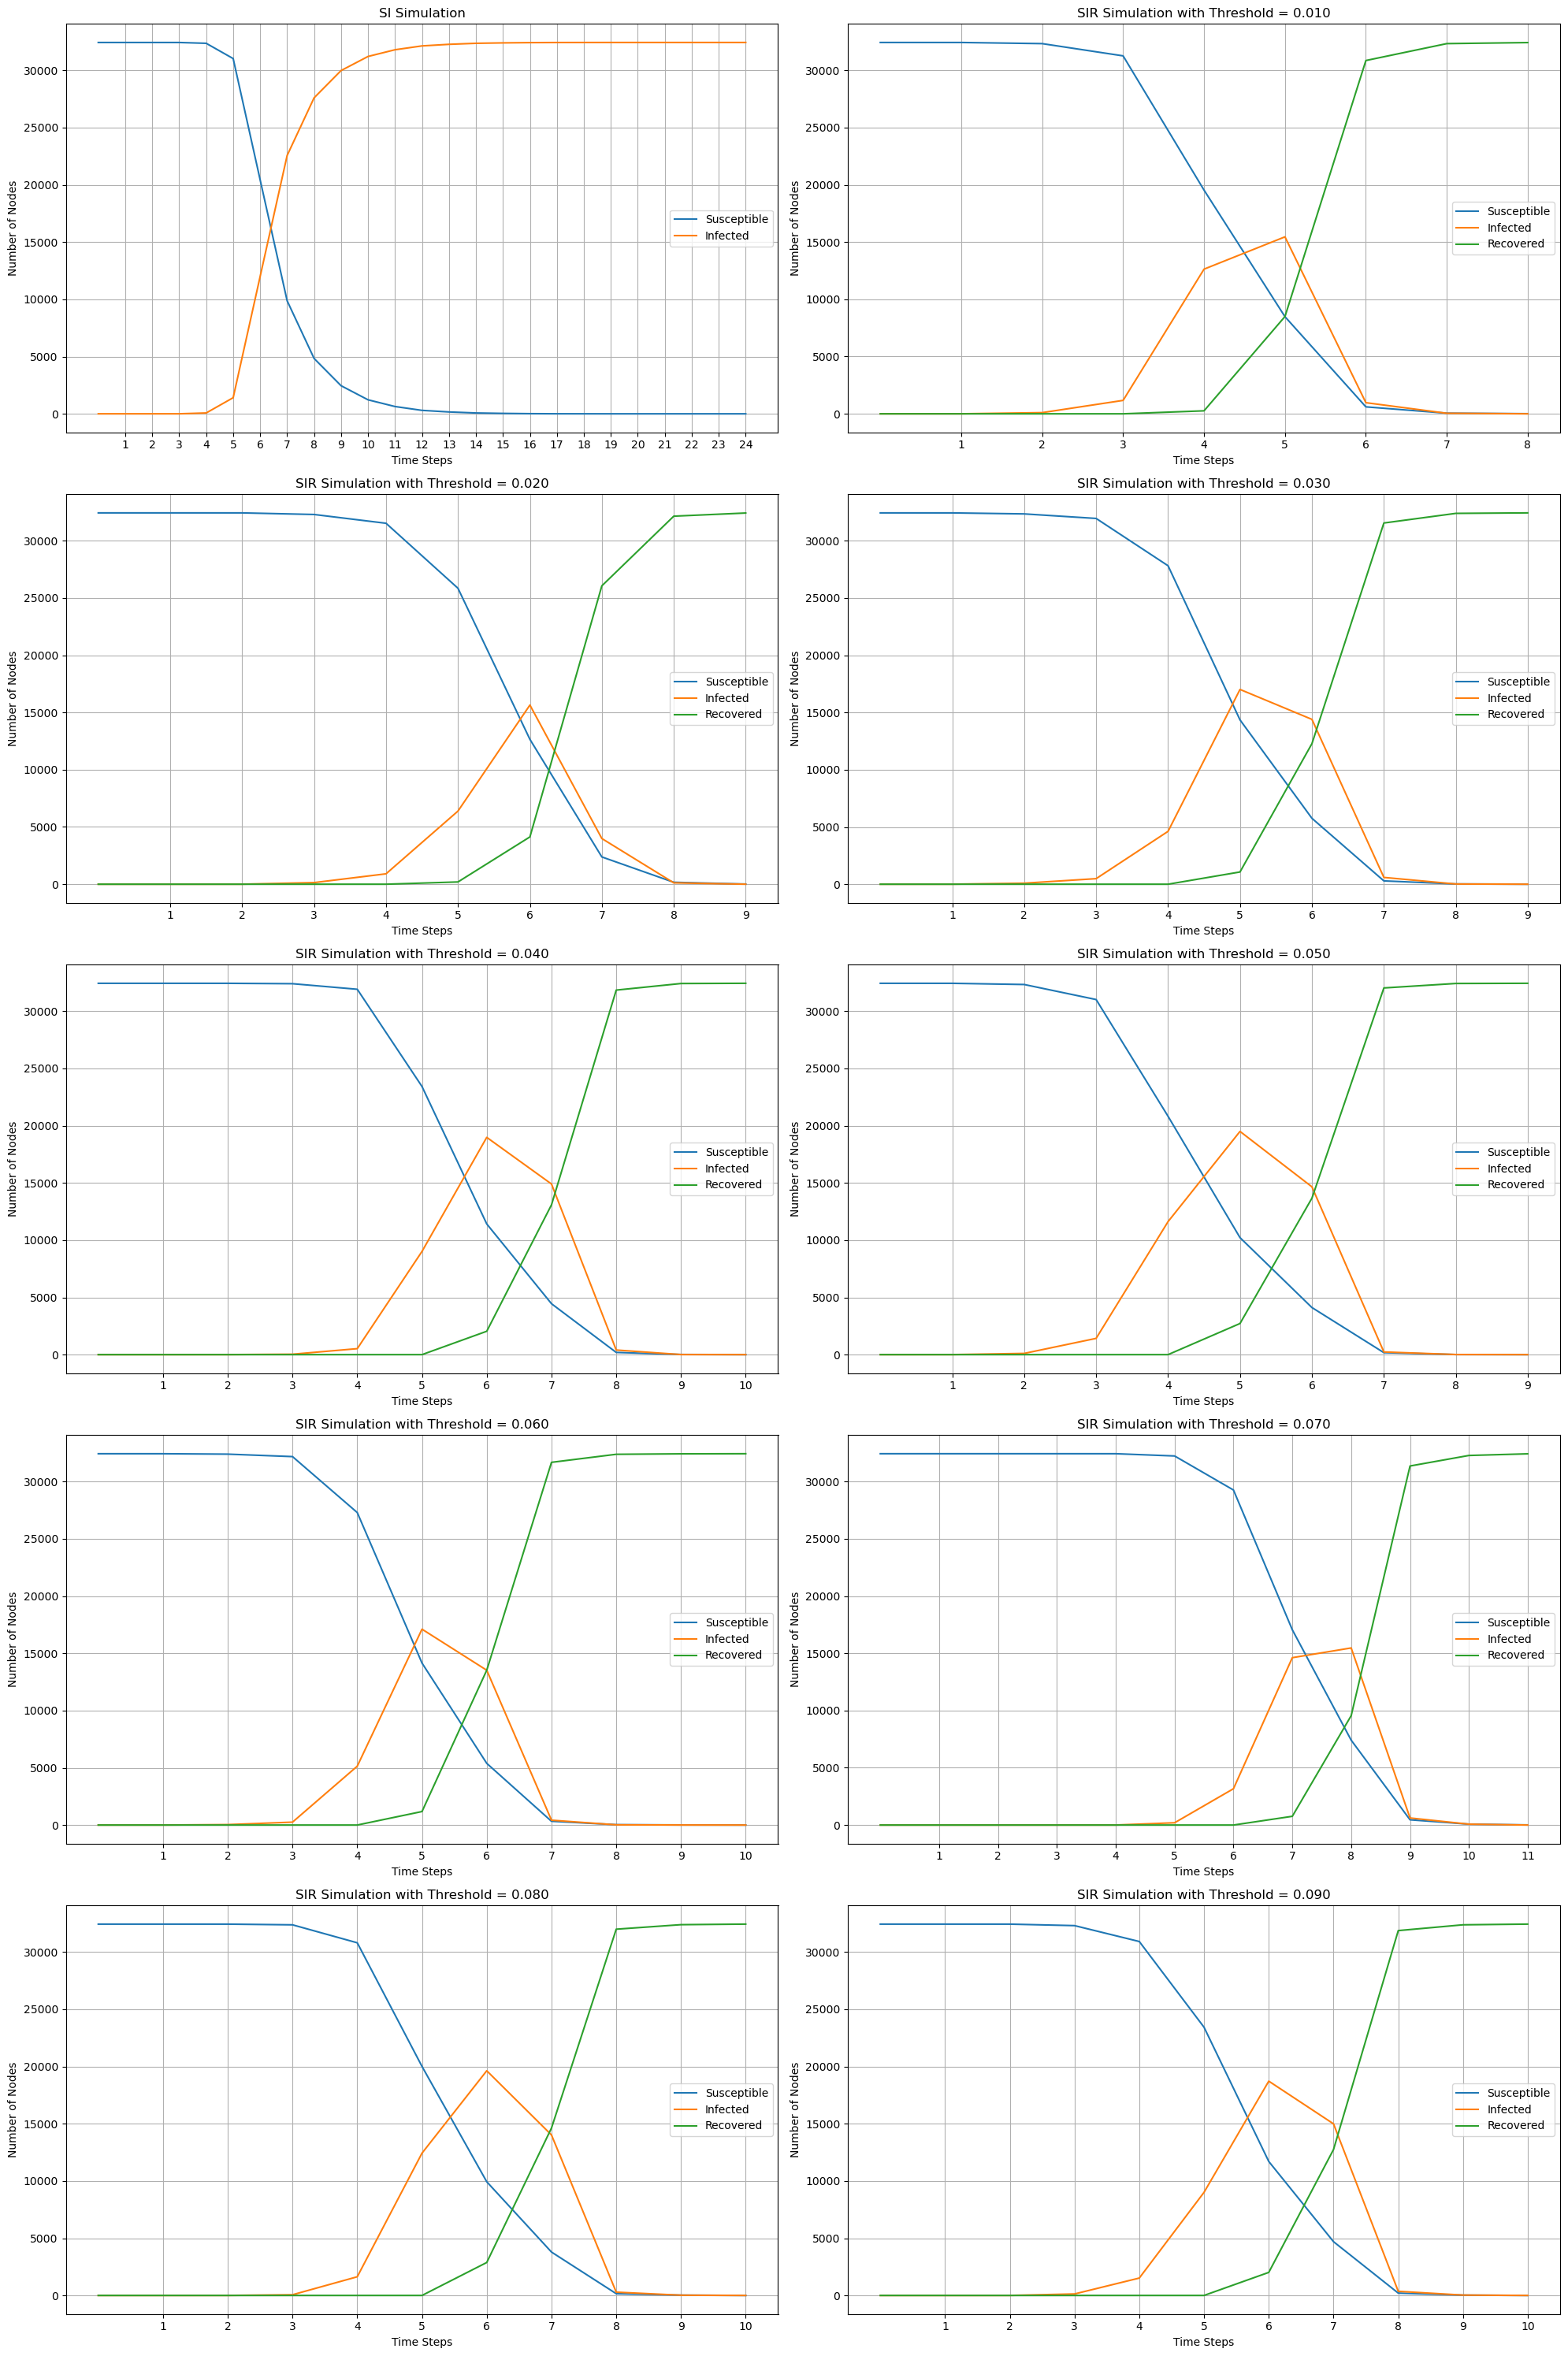

In [29]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV file and create the graph
file_path = 'data\data - fixed numbers.csv'  # Update with the actual path to your file data\final_final_random_graph.csv
edge_df = pd.read_csv(file_path, delimiter=' ')
G = nx.from_pandas_edgelist(edge_df, 'Source', 'Target')

# SIR parameters
beta = 0.5      # Transmission probability
gamma = 0.23    # Recovery probability
initial_infected = 1
time_steps = 25  # Adjust based on required duration

# Initialize plot
plt.figure(figsize=(20, 30))

# Loop through thresholds from 0.1 to 0.9
for i, recovery_threshold in enumerate(np.arange(0.0, 0.1, 0.01), start=1):
    # Initialize states
    if recovery_threshold == 0.0:
        gamma = 0
    else:
        gamma = 0.23
    nodes = list(G.nodes)
    n = len(nodes)
    infected_nodes = np.random.choice(nodes, replace=False)
    node_states = {node: 'S' for node in nodes}  # All nodes start as Susceptible (S)
    node_states[infected_nodes] = 'I'
#     node_states[102] = 'R'  # Make sure a node starts as recovered
    
    # Record initial state counts
    susceptible_counts = [n - initial_infected]
    infected_counts = [initial_infected]
    recovered_counts = [0]

    # Simulation loop
    for t in range(1, time_steps):
        new_states = node_states.copy()
        for node in nodes:
            if node_states[node] == 'I':  # Infected node
                # Spread to neighbors
                for neighbor in G.neighbors(node):
                    if node_states[neighbor] == 'S' and np.random.rand() < beta:
                        new_states[neighbor] = 'I'
                # Recover
                if np.random.rand() < gamma and infected_counts[-1] / n > recovery_threshold:
                    new_states[node] = 'R'
                    
            if node_states[node] == 'R':  # Recovered node spreads immunity
                for neighbor in G.neighbors(node):
                    if node_states[neighbor] == 'S' or node_states[neighbor] == 'I':
                        new_states[neighbor] = 'R'
        
        # Update states
        node_states = new_states
        susceptible_counts.append(sum(1 for state in node_states.values() if state == 'S'))
        infected_counts.append(sum(1 for state in node_states.values() if state == 'I'))
        recovered_counts.append(sum(1 for state in node_states.values() if state == 'R'))
        
        # Break if no more infected
        if infected_counts[-1] == 0:
            break
    print(max(infected_counts), len(infected_counts))
    # Plot results for the current threshold
    plt.subplot(5, 2, i)
    if recovery_threshold == 0.0:
        plt.title("SI Simulation")
        plt.plot(susceptible_counts, label="Susceptible")
        plt.plot(infected_counts, label="Infected")
        plt.xlabel("Time Steps")
        plt.ylabel("Number of Nodes")
        plt.xticks(ticks = range(1, len(susceptible_counts)))
        plt.legend()
        plt.grid()
    else:
        plt.title(f"SIR Simulation with Threshold = {recovery_threshold:.3f}")
        plt.plot(susceptible_counts, label="Susceptible")
        plt.plot(infected_counts, label="Infected")
        plt.plot(recovered_counts, label="Recovered")
        plt.xlabel("Time Steps")
        plt.ylabel("Number of Nodes")
        plt.xticks(ticks = range(1, len(susceptible_counts)))
        plt.legend()
        plt.grid()

# Adjust layout and display all plots
plt.tight_layout()
plt.show()


1,0.1:  32391 100
1,0.2:  32430 53
1,0.5:  32430 23
2,0.1:  32430 96
2,0.2:  32430 66
2,0.5:  32430 21
{'1,0.1': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 27, 111, 434, 1581, 3972, 6968, 9860, 12434, 14614, 16576, 18334, 19831, 21151, 22314, 23361, 24322, 25174, 25921, 26600, 27220, 27743, 28183, 28618, 29045, 29399, 29713, 30012, 30272, 30505, 30678, 30845, 31001, 31153, 31279, 31393, 31487, 31578, 31676, 31762, 31822, 31879, 31940, 31977, 32025, 32060, 32095, 32133, 32164, 32195, 32217, 32243, 32268, 32279, 32289, 32305, 32319, 32331, 32343, 32351, 32358, 32365, 32370, 32376, 32381, 32391], '1,0.2': [1, 1, 1, 1, 1, 2, 41, 305, 1732, 5947, 11683, 16112, 19585, 22234, 24231, 25920, 27243, 28317, 29152, 29782, 30362, 30740, 31084, 31348, 31575, 31730, 31856, 31981, 32062, 32132, 32192, 32236, 32284, 32323, 32345, 32360, 32372, 32394, 32399, 32407, 32412, 32418, 32420, 32422, 32423, 32424, 32427, 32427, 32428, 32429, 32429, 

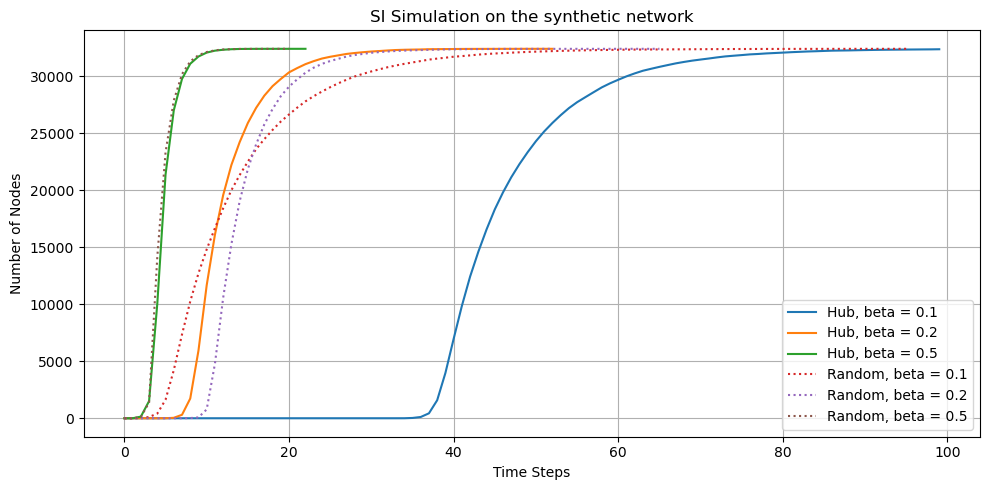

In [32]:
gamma = 0.23    # Recovery probability
initial_infected = 1
sim_history = {}
plt.figure(figsize=(10, 5))
time_steps = 100  # Adjust based on required duration
degrees = dict(G.degree())
# Loop through thresholds from 0.1 to 0.9
for case in [1, 2]:
    for beta in [0.1, 0.2, 0.5]:
        # Initialize states
        nodes = list(G.nodes)
        n = len(nodes)
        if case==2:
            infected_nodes = np.random.choice(nodes, replace=False)
        elif case==1:
            
            max_degree = max(degrees.values())

            # Find all nodes with the minimum degree
            max_degree_nodes = [node for node, degree in degrees.items() if degree == max_degree]

            # Choose one randomly
            infected_node = np.random.choice(max_degree_nodes, replace=False)
        else:
            min_degree = min(degrees.values())

        # Find all nodes with the minimum degree
            min_degree_nodes = [node for node, degree in degrees.items() if degree == min_degree]

            # Choose one randomly
            infected_node = np.random.choice(min_degree_nodes, replace=False)

        node_states = {node: 'S' for node in nodes}  # All nodes start as Susceptible (S)
        node_states[infected_nodes] = 'I'
        # node_states[102] = 'R'  # Make sure a node starts as recovered

        # Record initial state counts
        susceptible_counts = [n - 1]  # Assuming 1 initial infected
        infected_counts = [1]  # Assuming 1 initial infected

        # Simulation loop
        for t in range(1, time_steps):
            new_states = node_states.copy()
            for node in nodes:
                if node_states[node] == 'I':  # Infected node
                    # Spread to neighbors
                    for neighbor in G.neighbors(node):
                        if node_states[neighbor] == 'S' and np.random.rand() < beta:
                            new_states[neighbor] = 'I'

            # Update states
            node_states = new_states
            susceptible_counts.append(sum(1 for state in node_states.values() if state == 'S'))
            infected_counts.append(sum(1 for state in node_states.values() if state == 'I'))

            # Break if no more infected
            if susceptible_counts[-1] == 0:
                break

        sim_history.update({f"{case},{beta}": infected_counts})
        print(f"{case},{beta}: ",max(infected_counts), len(infected_counts))
print(sim_history)
plt.title("SI Simulation on the synthetic network")
for key in sim_history:
    if key[0]=="1":
        plt.plot(sim_history[key], label=f"Hub, beta = {key[2:]}")
    if key[0]=="2":
        plt.plot(sim_history[key], label=f"Random, beta = {key[2:]}", linestyle ='dotted')
plt.xlabel("Time Steps")
plt.ylabel("Number of Nodes")
#plt.xticks(ticks = range(1, len(susceptible_counts)))
plt.legend(loc=4)
plt.grid()
plt.tight_layout()
#plt.savefig("SI with different ifn rate on syn")
plt.show()

In [43]:
p=[]
for k,v in degrees.items():
    if v not in range(1,50):
        p.append(key)
print(len(p))
print(len(degrees))

403
32430
